In [161]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn as sk
import quandl


%matplotlib inline
plt.style.use("ggplot")

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from keras.models import Sequential
from keras.layers import Dense

In [163]:


quandl.ApiConfig.api_key = '-sB9AdohxNUey-w8-99z'
sp500 = quandl.get("MULTPL/SP500_PE_RATIO_MONTH",start_date='1991-01-01', end_date='2008-7-31' )
metals = quandl.get('LBMA/GOLD',start_date='1991-01-01', end_date='2008-7-31')
metals = metals.drop(columns = ['EURO (AM)','EURO (PM)','GBP (AM)', 'USD (PM)','GBP (PM)'])
plat=quandl.get("LPPM/PLAT",start_date='1991-01-01', end_date='2008-7-31')
plat =plat.drop(columns = ['EUR AM','EUR PM','GBP AM', 'USD PM','GBP PM'])
sp500['SMA'] = sp500.iloc[:,0].rolling(window = 3).mean()-sp500.iloc[:,0]
metals['PLAT'] = plat['USD AM']
metals['Index'] = range(1,4446)
metals= metals.set_index('Index')



In [164]:
y=metals['USD (AM)']
y.head

<bound method NDFrame.head of Index
1       392.50
2       386.75
3       388.10
4       391.00
5       392.80
         ...  
4441    932.25
4442    929.25
4443    928.75
4444    914.10
4445    912.00
Name: USD (AM), Length: 4445, dtype: float64>

In [165]:
startTrain = 3000
endTrain = 3500
startPredict = 3500
endPredict = 3600


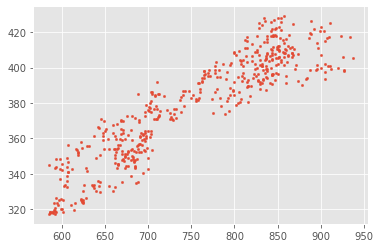

In [166]:
plt.scatter(metals.iloc[startTrain:endTrain,1].values, metals.iloc[startTrain:endTrain,0].values, s = 5)
plt.show()

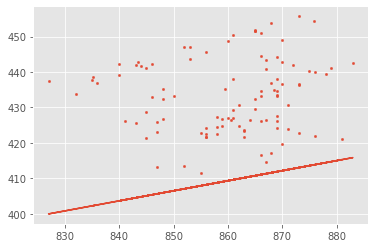

In [167]:

X=metals.iloc[startTrain:endTrain,1].values[:,np.newaxis]
y=metals.iloc[startTrain:endTrain,0].values[:,np.newaxis]
T = metals.iloc[startPredict:endPredict,1].values[:,np.newaxis]
y2 = metals.iloc[startPredict:endPredict,0].values[:,np.newaxis]
regr = MLPRegressor(random_state=2, max_iter=1000,solver = 'lbfgs',alpha= .01).fit(X, y)
predict = regr.predict(T)

plt.scatter(metals.iloc[startPredict:endPredict,1].values, metals.iloc[startPredict:endPredict,0].values, s = 5)
plt.plot(metals.iloc[startPredict:endPredict,1].values,predict)
plt.show()


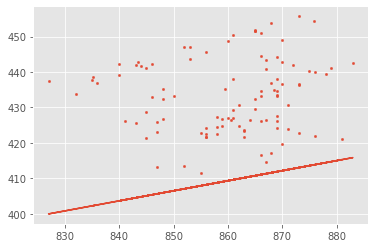

In [168]:
X=metals.iloc[startTrain:endTrain,1].values[:,np.newaxis]
y=metals.iloc[startTrain:endTrain,0].values[:,np.newaxis]
T = metals.iloc[startPredict:endPredict,1].values[:,np.newaxis]
y2 = metals.iloc[startPredict:endPredict,0].values[:,np.newaxis]

linear = LinearRegression().fit(X, y)
predict2 = linear.predict(T)

plt.scatter(metals.iloc[startPredict:endPredict,1].values, metals.iloc[startPredict:endPredict,0].values, s = 5)
plt.plot(metals.iloc[startPredict:endPredict,1].values,predict)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

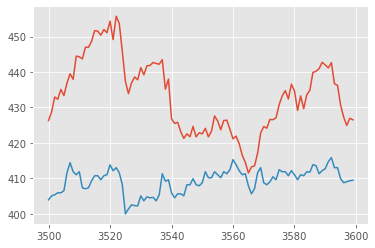

In [169]:
plt.plot(np.arange(startPredict,endPredict,1),y2)
plt.plot(np.arange(startPredict,endPredict,1),predict)
plt.show


In [170]:
Xten=metals.iloc[startTrain:endTrain,:].values
yten=metals.iloc[startTrain:endTrain,0].values

model = Sequential()
model.add(Dense(20, activation="relu", input_dim=2, kernel_initializer="uniform"))
model.add(Dense(1, activation="linear", kernel_initializer="uniform"))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

model.fit(Xten,yten, epochs=50, batch_size=10,  verbose=2)

T = metals.iloc[startPredict:endPredict,:].values
y2 = metals.iloc[startPredict:endPredict,0].values

tenPredict = model.predict(T)


Epoch 1/50
50/50 - 0s - loss: 133984.4531 - accuracy: 0.0000e+00
Epoch 2/50
50/50 - 0s - loss: 91672.9609 - accuracy: 0.0000e+00
Epoch 3/50
50/50 - 0s - loss: 33663.1406 - accuracy: 0.0000e+00
Epoch 4/50
50/50 - 0s - loss: 4331.1626 - accuracy: 0.0000e+00
Epoch 5/50
50/50 - 0s - loss: 340.6206 - accuracy: 0.0000e+00
Epoch 6/50
50/50 - 0s - loss: 261.2675 - accuracy: 0.0000e+00
Epoch 7/50
50/50 - 0s - loss: 261.0864 - accuracy: 0.0000e+00
Epoch 8/50
50/50 - 0s - loss: 260.1472 - accuracy: 0.0000e+00
Epoch 9/50
50/50 - 0s - loss: 259.5523 - accuracy: 0.0000e+00
Epoch 10/50
50/50 - 0s - loss: 258.7653 - accuracy: 0.0000e+00
Epoch 11/50
50/50 - 0s - loss: 258.8149 - accuracy: 0.0000e+00
Epoch 12/50
50/50 - 0s - loss: 257.5052 - accuracy: 0.0000e+00
Epoch 13/50
50/50 - 0s - loss: 256.9099 - accuracy: 0.0000e+00
Epoch 14/50
50/50 - 0s - loss: 256.3188 - accuracy: 0.0000e+00
Epoch 15/50
50/50 - 0s - loss: 255.3950 - accuracy: 0.0000e+00
Epoch 16/50
50/50 - 0s - loss: 254.7846 - accuracy: 0.00

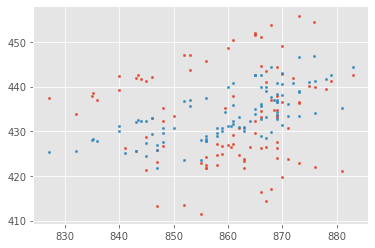

In [171]:
plt.scatter(metals.iloc[startPredict:endPredict,1].values, metals.iloc[startPredict:endPredict,0].values, s = 5)
plt.scatter(metals.iloc[startPredict:endPredict,1].values,tenPredict, s = 5)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

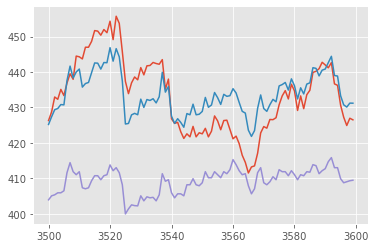

In [172]:
plt.plot(np.arange(startPredict,endPredict,1),y2)
plt.plot(np.arange(startPredict,endPredict,1),tenPredict)
plt.plot(np.arange(startPredict,endPredict,1),predict)
plt.show